In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
final_data = "finaldataset_20.csv"
final_data = pd.read_csv(final_data)

In [ ]:
# Chia dữ liệu thành train/test
X = final_data.drop(columns=['URL_Type_obf_Type'])  # Loại bỏ nhãn
y = final_data['URL_Type_obf_Type']

In [ ]:
X = X.astype(np.float64)

In [ ]:
# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Chuẩn hóa dữ liệu cho các mô hình học sâu
scaler = StandardScaler()

# Kiểm tra và thay thế các giá trị vô cùng bằng NaN trong X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan)
# Thay thế NaN bằng giá trị trung bình của cột trong X_train
X_train = X_train.fillna(X_train.mean())

# fit_transform trên X_train sau khi xử lý dữ liệu
X_train_scaled = scaler.fit_transform(X_train)

# Áp dụng cùng bước xử lý cho X_test
# Kiểm tra và thay thế các giá trị vô cùng bằng NaN trong X_test
X_test = X_test.replace([np.inf, -np.inf], np.nan)
# Thay thế NaN bằng giá trị trung bình của cột trong X_test (sử dụng mean của X_train)
X_test = X_test.fillna(X_train.mean())

# transform X_test sau khi xử lý dữ liệu
X_test_scaled = scaler.transform(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Khởi tạo và huấn luyện
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train, y_train)

# Đánh giá
y_pred_lr = lr_model.predict(X_test)
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))



Logistic Regression:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1586
           1       0.70      0.84      0.77      1556
           2       0.50      0.32      0.39      1343
           3       0.65      0.72      0.68      1517
           4       0.71      0.70      0.71      1340

    accuracy                           0.67      7342
   macro avg       0.65      0.66      0.65      7342
weighted avg       0.65      0.67      0.66      7342



**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo và huấn luyện
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Đánh giá
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))



Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1586
           1       0.98      0.99      0.98      1556
           2       0.99      0.98      0.98      1343
           3       0.95      0.95      0.95      1517
           4       0.99      0.97      0.98      1340

    accuracy                           0.98      7342
   macro avg       0.98      0.98      0.98      7342
weighted avg       0.98      0.98      0.98      7342



**XGBoost**

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both train and test labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Now you can train your XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb))


XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1586
           1       0.98      0.99      0.99      1556
           2       0.98      0.99      0.99      1343
           3       0.97      0.95      0.96      1517
           4       0.99      0.99      0.99      1340

    accuracy                           0.98      7342
   macro avg       0.98      0.98      0.98      7342
weighted avg       0.98      0.98      0.98      7342



**Deep Learning**

**MLP**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Tạo kiến trúc mạng
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(y.unique()), activation='softmax')  # Lớp đầu ra
])

# Compile mô hình
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện
mlp_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5924 - loss: 1.0366 - val_accuracy: 0.8039 - val_loss: 0.5561
Epoch 2/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7651 - loss: 0.6483 - val_accuracy: 0.8332 - val_loss: 0.4602
Epoch 3/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7911 - loss: 0.5685 - val_accuracy: 0.8473 - val_loss: 0.4087
Epoch 4/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8087 - loss: 0.5215 - val_accuracy: 0.8672 - val_loss: 0.3793
Epoch 5/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8224 - loss: 0.4810 - val_accuracy: 0.8793 - val_loss: 0.3395
Epoch 6/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8345 - loss: 0.4491 - val_accuracy: 0.8897 - val_loss: 0.3204
Epoch 7/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8445 - loss: 0.4226 - val_accuracy: 0.8864 - val_loss: 0.3165
Epoch 8/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8510 - loss: 0.4132 - val_accuracy: 0.

**LSTM**

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Flatten

# Tạo mô hình RNN/LSTM
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=X_train_scaled.shape[1]),  # Embedding layer
    LSTM(128, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(len(y.unique()), activation='softmax')
])

# Compile mô hình
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện
lstm_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


918/918 ━━━━━━━━━━━━━━━━━━━━ 67s 70ms/step - accuracy: 0.4394 - loss: 1.3139 - val_accuracy: 0.6964 - val_loss: 0.7890
Epoch 2/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.7099 - loss: 0.7470 - val_accuracy: 0.7439 - val_loss: 0.6667
Epoch 3/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.7482 - loss: 0.6409 - val_accuracy: 0.7665 - val_loss: 0.6062
Epoch 4/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.7680 - loss: 0.5879 - val_accuracy: 0.7787 - val_loss: 0.5841
Epoch 5/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.7764 - loss: 0.5561 - val_accuracy: 0.7800 - val_loss: 0.5584
Epoch 6/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 45s 49ms/step - accuracy: 0.7822 - loss: 0.5384 - val_accuracy: 0.7732 - val_loss: 0.5620
Epoch 7/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.7871 - loss: 0.5223 - val_accuracy: 0.7750 - val_loss: 0.5603
Epoch 8/20
918/918 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.7873 - loss: 0.5133 - val_accurac

In [ ]:
print("y_test type:", type(y_test[0])) # Use array indexing instead of iloc
print("y_pred type:", type(y_pred_lr[0]))

y_test type: <class 'numpy.int64'>
y_pred type: <class 'numpy.int64'>


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
le = LabelEncoder()
le.fit(y_pred_lr) # Fit the LabelEncoder to your predictions or the original training labels (y_train)
y_pred_encoded = le.transform(y_pred_lr)  # Now you can transform y_pred_lr


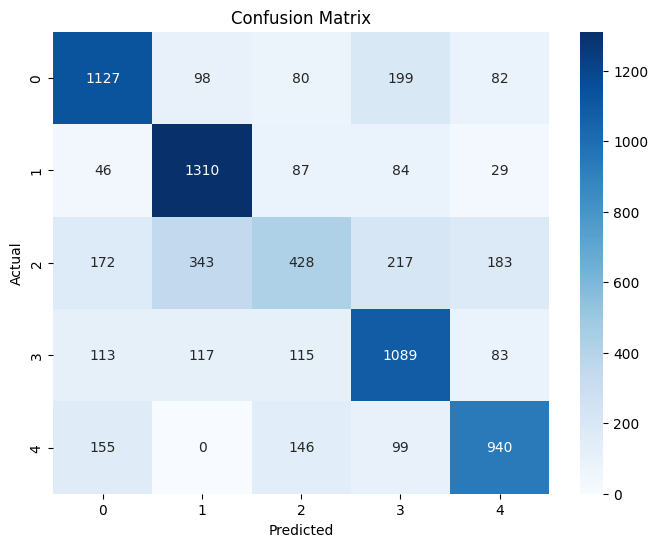

In [ ]:
!pip install seaborn
import seaborn as sns
# Tạo và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_encoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()